## Análise de Engajamento em Redes Sociais

Este notebook realiza uma análise detalhada dos dados de engajamento em postagens de redes sociais. O objetivo é identificar padrões e tendências que possam influenciar o número de curtidas e comentários, com foco especial em variáveis como:

- **Uso de carrosséis**: Postagens que utilizam carrosséis de imagens (várias imagens ou vídeos exibidos em um único post e o usuário pode deslizarpara o lado e ver cada um em seuquência, presente apenas nas postagens que são do tipo foto).
- **Presença de pessoas nas fotos**: Impacto de ter pessoas nas imagens postadas.
- **Uso de tags**: Como diferentes tags afetam o engajamento.

A análise inclui tratamento de valores nulos, ordenação de registros, e agrupamento de dados para examinar o impacto dessas variáveis no engajamento das postagens. Gráficos e estatísticas são usados para visualizar as tendências e apoiar as conclusões tiradas.

#### Importação das bibliotecas e carregamento dos dados

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel("Dados_Instagram.xlsx")
df.head(2)

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958


#### Exclusão de colunas desnecessárias

In [6]:
df = df.drop(["Visualizações"], axis=1)
df.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


#### Informações gerais sobre o DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    8 non-null      object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


#### Contagem de valores da coluna "Carrossel" e tratamento de valores nulos

In [8]:
df.Carrossel.value_counts()
df.loc[df.Carrossel.isnull(),"Carrossel"] = "N"

#### Tratamento de valores nulos na coluna "Tags"

In [9]:
df.Tags.value_counts()
df.loc[df.Tags.isnull(),"Tags"] = "Sem tag"

#### Resumo estatístico do DataFrame

In [10]:
df.describe()

,Data,Curtidas,Comentários,Interacoes
count,52,52.000000,52.000000,52.000000
mean,2021-12-23 04:36:55.384615424,12262.730769,189.500000,12452.230769
min,2021-09-11 00:00:00,2807.000000,9.000000,2816.000000
25%,2021-10-23 06:00:00,5492.000000,69.500000,5562.500000
50%,2022-01-05 00:00:00,9603.000000,128.000000,9773.500000
75%,2022-02-15 12:00:00,17621.750000,265.250000,17920.750000
max,2022-03-27 00:00:00,37351.000000,852.000000,37853.000000
std,NaN,8165.875326,170.687709,8299.390088


#### Análise das curtidas: registros com mais e menos curtidas

In [11]:
print('Mais curtidas')
display(df.sort_values(by="Curtidas",ascending=False).head(3))
print('Menos curtidas')
display(df.sort_values(by="Curtidas",ascending=True).head(3))

Mais curtidas


,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563


Menos curtidas


,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910


#### Análise da relação entre data e número de curtidas

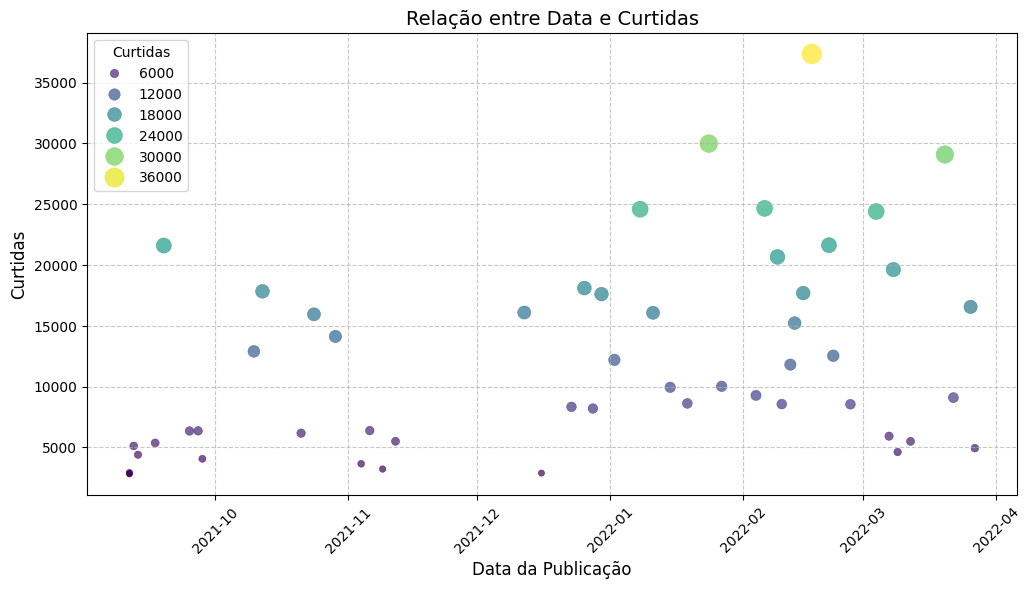

In [12]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x="Data", y="Curtidas", hue="Curtidas", palette="viridis", size="Curtidas", sizes=(20, 200), alpha=0.7, edgecolor=None)

plt.xlabel("Data da Publicação", fontsize=12)
plt.ylabel("Curtidas", fontsize=12)
plt.title("Relação entre Data e Curtidas", fontsize=14)

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

- Após a análise, concluímos que a data de publicação não parece ter um impacto significativo no número de curtidas recebidas pelas postagens.

#### Análise do impacto de pessoas nas fotos sobre o número de curtidas

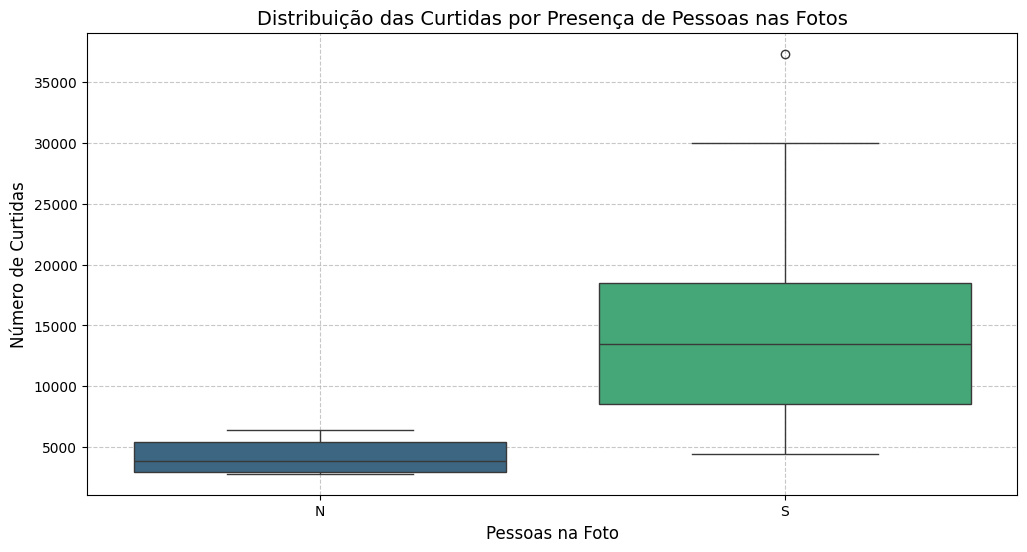

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Pessoas", y="Curtidas", hue='Pessoas', palette="viridis")

plt.xlabel("Pessoas na Foto", fontsize=12)
plt.ylabel("Número de Curtidas", fontsize=12)
plt.title("Distribuição das Curtidas por Presença de Pessoas nas Fotos", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

- A análise mostrou que a presença de pessoas nas fotos está gera um aumento significativo no número de curtidas.

#### Análise do tipo de postagem e seu impacto nas curtidas

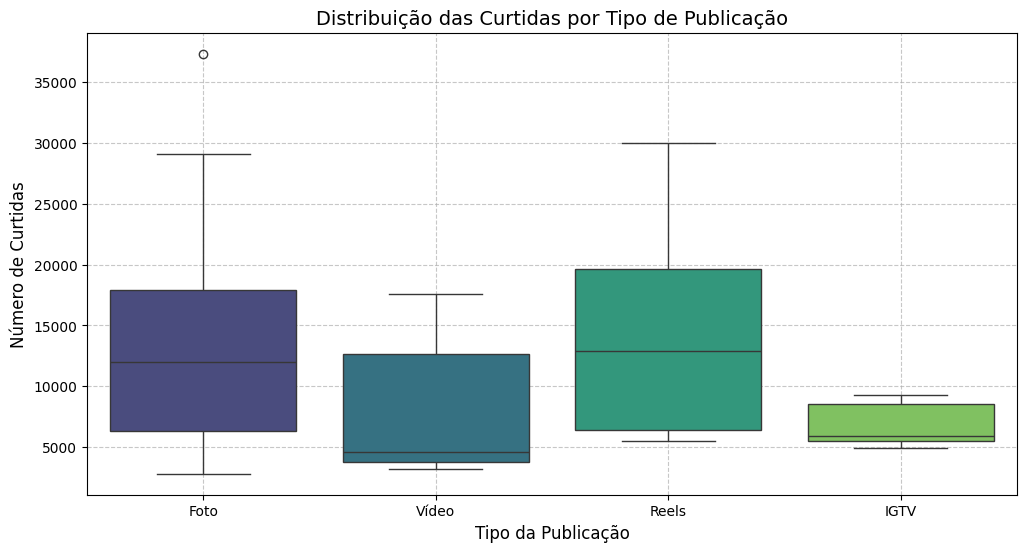

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Tipo", y="Curtidas", hue='Tipo', palette="viridis")

plt.xlabel("Tipo da Publicação", fontsize=12)
plt.ylabel("Número de Curtidas", fontsize=12)
plt.title("Distribuição das Curtidas por Tipo de Publicação", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

- A análise mostra que os tipos de postagens "Reels" e "Foto" têm muito mais curtidas comparado a outros tipos de postagens.

#### Interação entre tipo de postagem e presença de pessoas

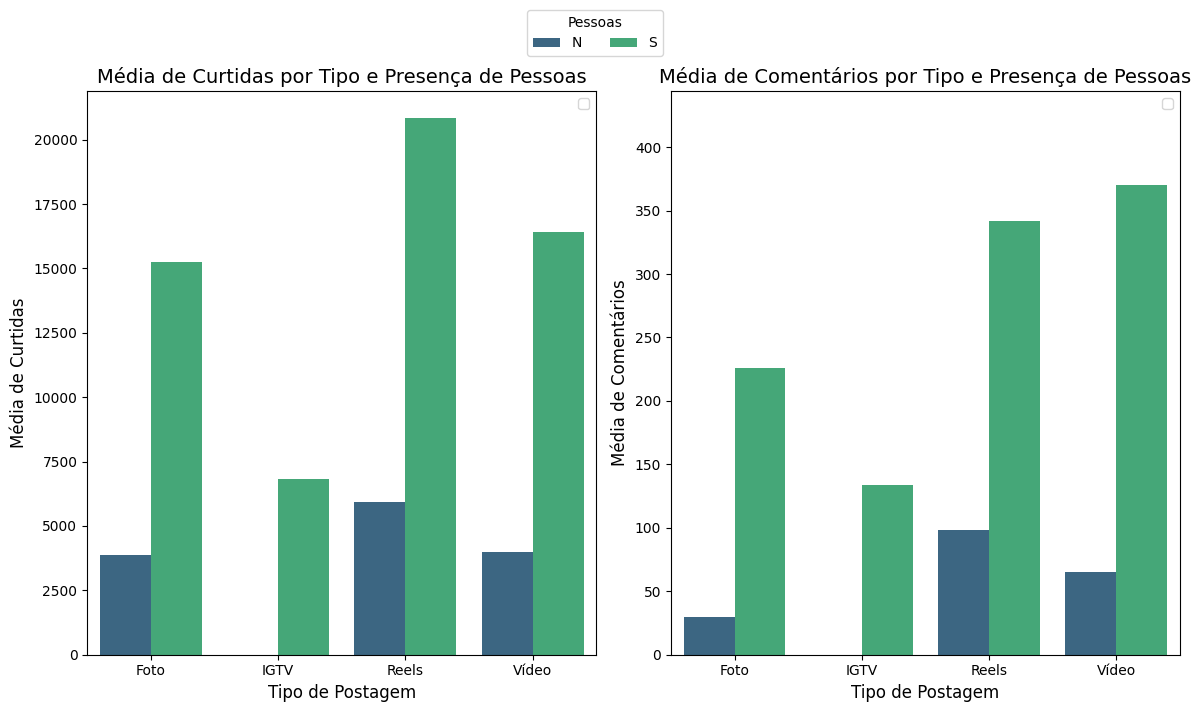

In [15]:
agrupamento = df.groupby(["Tipo", "Pessoas"])[["Curtidas", "Comentários"]].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=False)

sns.barplot(data=agrupamento, x="Tipo", y="Curtidas", hue="Pessoas", palette="viridis", ax=ax1)
ax1.set_title("Média de Curtidas por Tipo e Presença de Pessoas", fontsize=14)
ax1.set_xlabel("Tipo de Postagem", fontsize=12)
ax1.set_ylabel("Média de Curtidas", fontsize=12)
ax1.legend('')

sns.barplot(data=agrupamento, x="Tipo", y="Comentários", hue="Pessoas", palette="viridis", ax=ax2)
ax2.set_title("Média de Comentários por Tipo e Presença de Pessoas", fontsize=14)
ax2.set_xlabel("Tipo de Postagem", fontsize=12)
ax2.set_ylabel("Média de Comentários", fontsize=12)
ax2.set_ylim(0, agrupamento["Comentários"].max() * 1.2)
ax2.legend('')

handles, labels = ax1.get_legend_handles_labels()  
fig.legend(handles, labels, title="Pessoas", loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=len(labels))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


- A análise mostra que a presença de pessoas em publicações tem um efeito muito positivo no aumento do engajamento, independentemente do tipo de conteúdo. Ou seja:


#### Engajamento em fotos com e sem carrossel


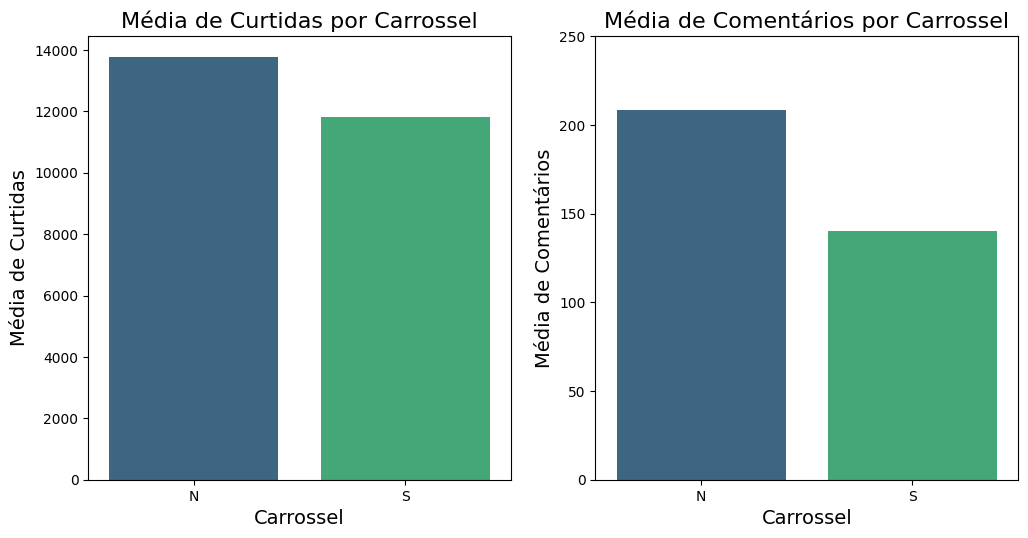

In [16]:
agrupamento = df[df.Tipo == "Foto"].groupby(["Carrossel"])[["Curtidas", "Comentários"]].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

sns.barplot(data=agrupamento, x="Carrossel", y="Curtidas", hue='Carrossel', ax=ax1, palette="viridis")
ax1.set_title("Média de Curtidas por Carrossel", fontsize=16)
ax1.set_xlabel("Carrossel", fontsize=14)
ax1.set_ylabel("Média de Curtidas", fontsize=14)

sns.barplot(data=agrupamento, x="Carrossel", y="Comentários",hue='Carrossel', ax=ax2, palette="viridis")
ax2.set_title("Média de Comentários por Carrossel", fontsize=16)
ax2.set_xlabel("Carrossel", fontsize=14)
ax2.set_ylabel("Média de Comentários", fontsize=14)
ax2.set_ylim(0, agrupamento["Comentários"].max() * 1.2) 

plt.subplots_adjust(top=0.85)
plt.show()


- A análise indica que publicações que não são carrosséis tendem a receber mais curtidas do que aquelas que são carrosséis. 

#### Análise do impacto de campanhas e presença de pessoas no engajamento

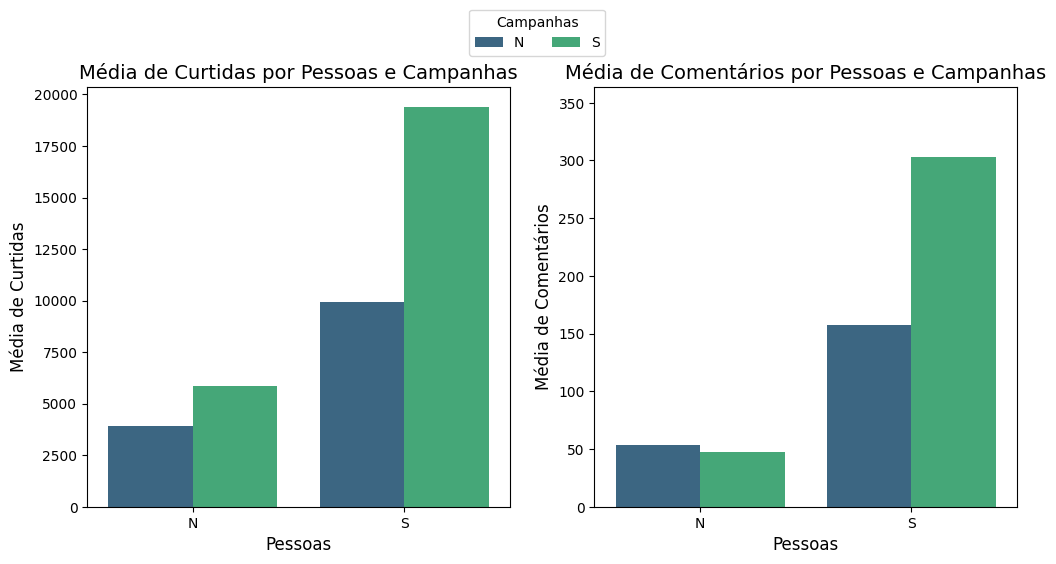

In [17]:
agrupamento = df.groupby(["Pessoas", "Campanhas"])[["Curtidas", "Comentários"]].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


sns.barplot(data=agrupamento, x="Pessoas", y="Curtidas", hue="Campanhas", ax=ax1, palette="viridis")
ax1.set_title("Média de Curtidas por Pessoas e Campanhas", fontsize=14)
ax1.set_xlabel("Pessoas", fontsize=12)
ax1.set_ylabel("Média de Curtidas", fontsize=12)
ax1.legend_.remove() 

sns.barplot(data=agrupamento, x="Pessoas", y="Comentários", hue="Campanhas", ax=ax2, palette="viridis")
ax2.set_title("Média de Comentários por Pessoas e Campanhas", fontsize=14)
ax2.set_xlabel("Pessoas", fontsize=12)
ax2.set_ylabel("Média de Comentários", fontsize=12)
ax2.set_ylim(0, agrupamento["Comentários"].max() * 1.2)
ax2.legend_.remove() 

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title="Campanhas", loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=len(labels))

plt.subplots_adjust(top=0.85, bottom=0.15)
plt.show()


- A análise revela que postagens que incluem pessoas e que são do tipo campanhas apresentam um maior engajamento em comparação com outras postagens.

#### Análise das tags e sua influência no engajamento

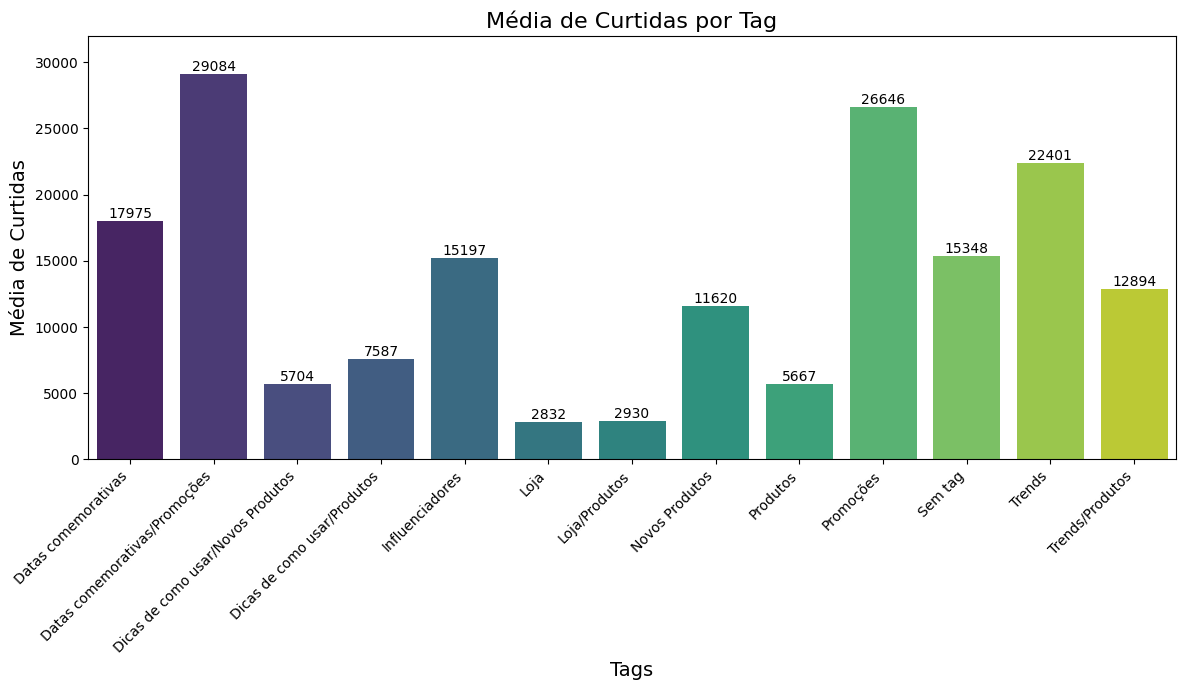

In [18]:
agrupamento = df.groupby("Tags")["Curtidas"].mean().reset_index()

plt.figure(figsize=(12, 7))

sns.barplot(data=agrupamento, x="Tags", y="Curtidas",hue='Tags', palette="viridis")
plt.title("Média de Curtidas por Tag", fontsize=16)
plt.xlabel("Tags", fontsize=14)
plt.ylabel("Média de Curtidas", fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, agrupamento["Curtidas"].max() * 1.1)

for index, linha in agrupamento.iterrows():
    plt.text(linha.name, linha.Curtidas, f'{linha.Curtidas:.0f}', color='black', ha="center", va="bottom")

plt.tight_layout()
plt.show()

##### A análise das tags revelou que as postagens com as seguintes tags tendem a receber um maior número de curtidas:

- **Promoções**: As postagens que utilizam a tag "promoções" têm um engajamento significativamente maior em termos de curtidas. Isso pode ser atribuído ao fato de que promoções geralmente atraem a atenção dos usuários, oferecendo ofertas e descontos que são atraentes para o público.

- **Datas Comemorativas**: Postagens associadas a "datas comemorativas" também apresentam um alto número de curtidas. Esses momentos especiais despertam o desejo de compartilhar e celebrar com os outros, o que resulta em maior engajamento.

- **Trends**: As tags relacionadas a "trends" mostram um aumento no número de curtidas. Isso se deve ao fato de que trends atuais geram muito marketing e capturam a atenção do público, levando a um maior envolvimento com as postagens que seguem essas trends.

#### Análise combinada de tags com pessoas

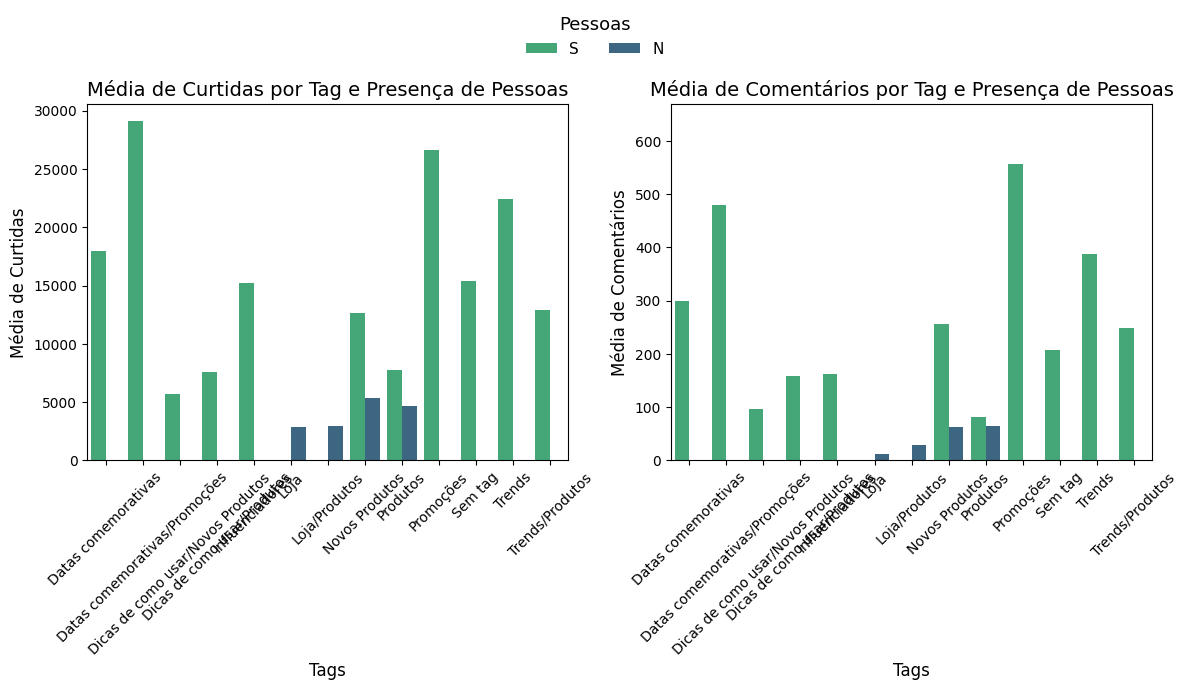

In [19]:
agrupamento = df.groupby(["Tags", "Pessoas"])[["Curtidas", "Comentários"]].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=False)

palette = sns.color_palette("viridis", 2)  
color_dict = {'N': palette[0], 'S': palette[1]}

sns.barplot(data=agrupamento, x="Tags", y="Curtidas", hue="Pessoas", ax=ax1, palette=color_dict)
ax1.set_title("Média de Curtidas por Tag e Presença de Pessoas", fontsize=14)
ax1.set_xlabel("Tags", fontsize=12)
ax1.set_ylabel("Média de Curtidas", fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend_.remove() 

sns.barplot(data=agrupamento, x="Tags", y="Comentários", hue="Pessoas", ax=ax2, palette=color_dict)
ax2.set_title("Média de Comentários por Tag e Presença de Pessoas", fontsize=14)
ax2.set_xlabel("Tags", fontsize=12)
ax2.set_ylabel("Média de Comentários", fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, agrupamento["Comentários"].max() * 1.2)
ax2.legend_.remove() 

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, ["S", "N"], title='Pessoas', loc='upper center', bbox_to_anchor=(0.5, 1.09), ncol=2, frameon=False, title_fontsize='13', fontsize='11')

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

- Após essa análise, podemos concluir que as tags associadas a postagens com pessoas tendem a ter um desempenho significativamente melhor em termos de engajamento.

# Conclusão do Projeto

Após uma análise detalhada dos dados de engajamento das postagens, pudemos extrair insights valiosos sobre os fatores que influenciam o número de curtidas e comentários. Sendo eles:

1. **Presença de Pessoas nas Postagens**: A presença de pessoas nas fotos e vídeos está fortemente associada a um aumento no engajamento. Observamos que postagens com pessoas tendem a receber mais curtidas e comentários do que aquelas sem pessoas, independentemente do tipo de postagem.

2. **Tipo de Postagem**: Postagens do tipo Reels e Foto são as que recebem mais curtidas em comparação com outros tipos de postagens, como Vídeos e Carrosséis. Essa tendência sugere que conteúdos visuais mais envolventes e de formato popular tendem a atrair mais atenção.

3. **Efeito dos Carrosséis**: As análises revelaram que postagens em formato de Carrossel geralmente têm menos curtidas em comparação com outros formatos.

4. **Influência da Data**: A data da postagem não parece ter um impacto significativo no número de curtidas. Isso sugere que a qualidade do conteúdo e a presença de pessoas são mais determinantes para o engajamento do que o momento da postagem.

5. **Tags Eficazes**: Postagens que utilizam tags como Promoções, Datas Comemorativas e Trends mostram um aumento significativo no número de curtidas. Essas tags atraem mais atenção e engajamento, especialmente quando associadas a postagens que incluem pessoas.

6. **Análise de Tags e Presença de Pessoas**: As postagens que combinam tags eficazes com a presença de pessoas tendem a ter o melhor desempenho em termos de engajamento. Portanto, utilizar tags relevantes e incluir pessoas nas postagens pode ser uma estratégia eficaz para maximizar o alcance e a interação.

Esses insights fornecem uma ótima para otimizar estratégias de conteúdo e engajamento. Ao focar em postagens que incluam pessoas, utilizar tipos de postagens visualmente atraentes e aplicar tags eficazes, é possível aumentar significativamente o engajamento nas redes sociais.